# Predicting Championships With Defense
## By Samuel Bihinda and Samuel Okesola

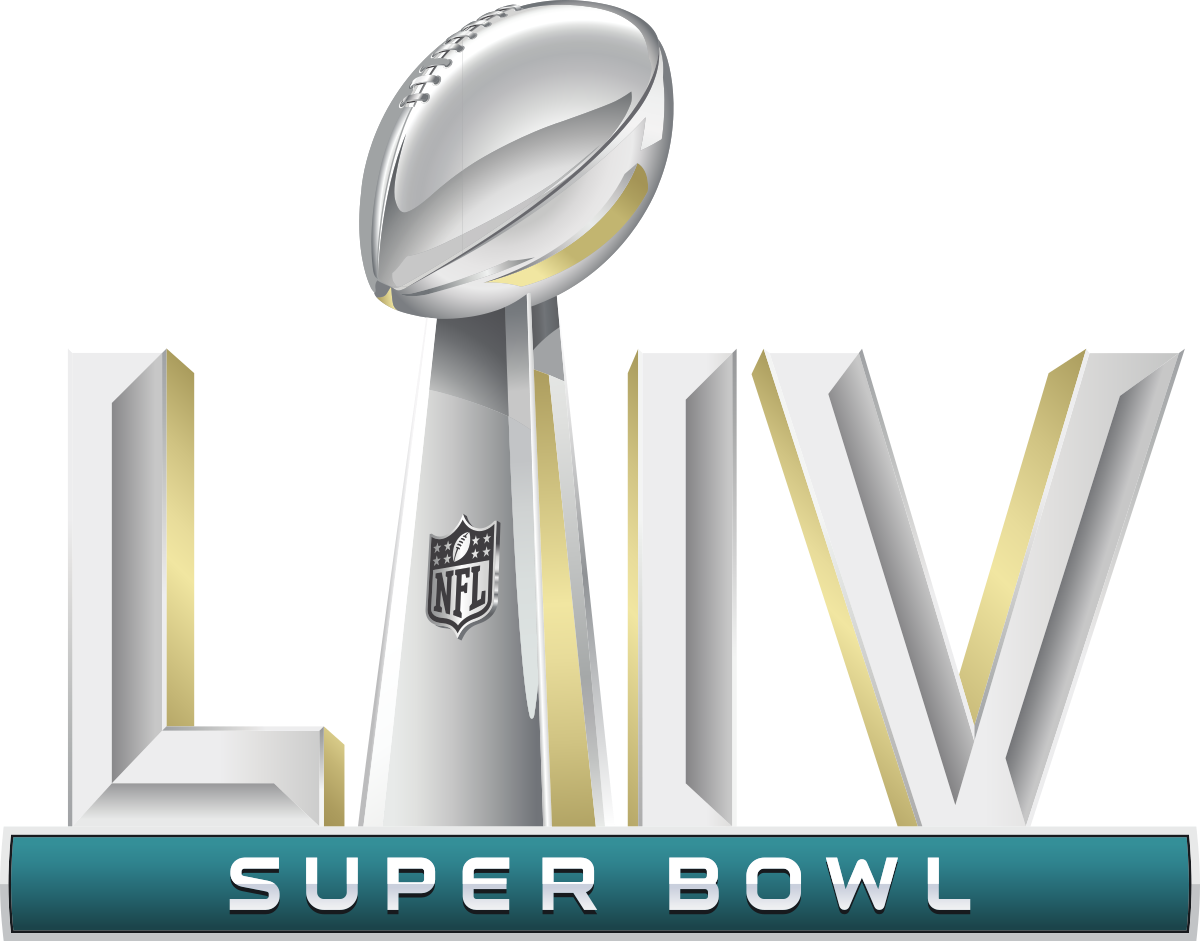

# Objective
In real life you can easily go up to any football fan right now and get their opinion on which team they believe will win this seasons Super Bowl. Super Bowl LVI!

That's fun and all but if you’re are seeking a more educated prediction, specifically one that is data diven then we'll need to run a machine learning model on past data to see which team is more likely to win Super Bowl LIV.

## The Insipration
### As the saying goes - "Defense win championships"

For many decades, defense in sports has been hailed as a critical component that drives a team's success. This has been embodied with the famous saying: "defense wins championships." The origins of this quote in National League Football (NFL) has extended onto other worldwide sports too. Even though the saying is quite old, modern reasearch and analysis has not done enough to actually put this theory to the test and truly determine if a defense can or cannot carry it's team to a championship win, specifically in the NFL. 

We will essentially be utalizing modern data science techniques in analysing whether the defensive production of a team can be used to determine the probability of them winning a  championships.

An estimated 45 million Americans plan to wager on the 2021 NFL season in some form according to NBC. Many of these wagers will certainly be of who the super bowl winner is. So the stakes are indeed very high. Especially with the gambling industry growing to a projected $ 270 million in revenue for the NFL this season according to NBC.

While there are several other contributing factors, the famous sports notion that "defense wins championships" is an intereseting inquiry that we can dive into with significant data. In the NFL, we’ve seen several scearos in which a defense has saved their team especailly when the offense is struggling.

However, we cannot just take this saying as a fact. Team's are made up of more than just a defense so we decided to look at data from about the last decade of NFL regular seasons to see how all 32 NFL teams fared in terms of their defensive production relative to super bowl champions.


# Data Tidying
## Let's start with collecting our data
### Dataset 1 - Team Defense stats
In this notebook our first dataset source concerning Team Defense per game stats will be from https://www.pro-football-reference.com/years/2010/opp.htm# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We will be observing data from the past NFL REGULAR seasons 2010-2021
years= ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

# The following merger function will take each nfl20XX.csv dataset file containing the defensive data for that year and merge them into one data frame 
def Merger(starting_year):
    team_df = pd.DataFrame()
    avg_df = pd.DataFrame()
    
    # Looping through each year for merging
    for year in years :
        currfile = pd.read_csv('nfl{}.csv'.format(year))
        team_currfile = currfile[:-3] #remove averages and totals
        team_currfile['Year'] = year
        
        avg_currfile =  currfile[-3:] #only include averages
        avg_currfile['Year'] = year
        
        team_data = [team_df, team_currfile[1:]]
        avg_data = [avg_df, avg_currfile]
        
        team_df= pd.concat(team_data)
        avg_df =  pd.concat(avg_data)
        
    return [team_df,avg_df]
dfs =  Merger(years)     

# team_df is a dataframe that will contain the defensive averages for each team thhroughout the years
team_df = dfs[0]

# avg_df is a dataframe that will contain the league defensive averages throughout the years
avg_df = dfs[1]

# renaming the columns properly
team_df.columns = ['Rank', 'Team', 'Games_Played', 'Points_Allowed', 'Total_Yards',
       'Offensive_Plays', 'Yards/Offensive_Play', 'Takeaways', 'Fumbles_Lost',
       'Total_1st_Downs', 'Passes_Completed', 'Passes_Attempted', 'Passing_Yards', 'Passing_Touchdowns',
       'Interceptions', 'Net_Yards/Pass', 'Passing_1st_Downs', 'Rushing_Attempts', 'Rushing_Yards',
       'Rushing_Touchdowns', 'Rushing_Yards/Attemps', 'Rushing_1st_Downs', 'Penalties', 'Penalty_Yards',
       'Penalty_1st_Downs', 'Scoring_Drive%', 'Turnover%', 'Expected_Points', 'Year']

/tmp/ipykernel_1766/356317246.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_currfile['Year'] = year
/tmp/ipykernel_1766/356317246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_currfile['Year'] = year


#### Data parsing

In [3]:
# filtering out data we don't need
team_df = team_df[['Team','Points_Allowed','Passing_Yards','Rushing_Yards',  'Passing_Touchdowns', 'Rushing_Touchdowns', 'Takeaways','Penalties',  'Year']]

# convert Year cloumn to integer to display and process properly
team_df['Year'] = team_df['Year'].astype('int32')

#display whole dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

team_df.reset_index(drop=True, inplace=True)

print("Team Defensive averages: ")
display(team_df.head())


#filter out data we don't need
avg_df = avg_df[avg_df['Unnamed: 1'] == 'Avg Tm/G']

#remove the first 3 unneeded columns
avg_df = avg_df.iloc[: , 3:]


# rename the columns
avg_df.columns = ['Avg_Points_Allowed','Avg_Total_Yards','Avg_Offensive_Plays', 'Avg_Yards/Offensive_Play',
                  'Avg_Takeaways', 'Avg_Fumbles_Lost','Avg_Total_1st_Downs', 'Avg_Passes_Completed', 
                  'Avg_Passes_Attempted', 'Avg_Passing_Yards', 'Avg_Passing_Touchdowns','Avg_Interceptions', 
                  'Avg_Net_Yards/Pass', 'Avg_Passing_1st_Downs', 'Avg_Rushing_Attempts', 'Avg_Rushing_Yards',
                  'Avg_Rushing_Touchdowns', 'Avg_Rushing_Yards/Attempts', 'Avg_Rushing_1st_Downs', 'Avg_Penalties', 
                  'Avg_Penalty_Yards','Avg_Penalty_1st_Downs', 'Avg_Scoring_Drive%', 'Avg_Turnover%', 
                  'Avg_Expected_Points', 'Year']


cols = list(avg_df.columns)
cols = [cols[-1]] + cols[:-1]
avg_df = avg_df[cols]
# reest the dataframe indexes
avg_df.reset_index(drop=True, inplace=True)

print("League wide defensive averages: ")
display(avg_df)

Team Defensive averages: 


/tmp/ipykernel_1766/92817402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Year'] = team_df['Year'].astype('int32')
/tmp/ipykernel_1766/92817402.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Team,Points_Allowed,Passing_Yards,Rushing_Yards,Passing_Touchdowns,Rushing_Touchdowns,Takeaways,Penalties,Year
0,Pittsburgh Steelers,14.5,214.1,62.8,0.94,0.31,2.19,5.38,2010
1,Green Bay Packers,15.0,194.2,114.9,1.00,0.38,2.00,6.13,2010
2,Baltimore Ravens,16.9,224.9,93.9,1.38,0.31,1.69,7.31,2010
3,Chicago Bears,17.9,224.3,90.1,0.88,0.88,2.19,5.81,2010
4,Atlanta Falcons,18.0,226.6,105.9,1.44,0.56,1.94,7.25,2010


League wide defensive averages: 


,Year,Avg_Points_Allowed,Avg_Total_Yards,Avg_Offensive_Plays,Avg_Yards/Offensive_Play,Avg_Takeaways,Avg_Fumbles_Lost,Avg_Total_1st_Downs,Avg_Passes_Completed,Avg_Passes_Attempted,Avg_Passing_Yards,Avg_Passing_Touchdowns,Avg_Interceptions,Avg_Net_Yards/Pass,Avg_Passing_1st_Downs,Avg_Rushing_Attempts,Avg_Rushing_Yards,Avg_Rushing_Touchdowns,Avg_Rushing_Yards/Attempts,Avg_Rushing_1st_Downs,Avg_Penalties,Avg_Penalty_Yards,Avg_Penalty_1st_Downs,Avg_Scoring_Drive%,Avg_Turnover%,Avg_Expected_Points
0,2010,22.0,336.0,63.1,5.3,1.7,0.7,18.9,20.5,33.7,221.6,1.5,1.0,6.2,11.5,27.2,114.5,0.8,4.2,6.0,6.1,50.9,1.5,32.4,13.3,NaN
1,2011,22.2,346.8,63.6,5.5,1.6,0.6,19.5,20.4,34.0,229.7,1.5,1.0,6.3,11.7,27.3,117.1,0.8,4.3,6.0,6.4,54.2,1.7,32.8,12.8,NaN
2,2012,22.8,347.2,64.2,5.4,1.6,0.6,19.8,21.2,34.7,231.3,1.5,0.9,6.2,12.0,27.2,115.9,0.8,4.3,6.1,6.3,53.2,1.8,33.7,12.5,NaN
3,2013,23.4,348.5,65.0,5.4,1.6,0.6,19.9,21.7,35.4,235.6,1.6,1.0,6.2,12.1,27.1,112.9,0.8,4.2,6.0,6.1,52.8,1.8,33.8,12.5,NaN
4,2014,22.6,348.1,64.0,5.4,1.5,0.6,20.0,21.9,34.9,236.8,1.6,0.9,6.4,12.3,26.7,111.3,0.7,4.2,5.8,6.6,55.5,2.0,34.1,12.1,NaN
5,2015,22.8,352.7,64.4,5.5,1.5,0.6,20.1,22.5,35.7,243.8,1.6,0.9,6.4,12.3,26.3,108.8,0.7,4.1,5.8,6.9,58.9,2.0,34.3,11.7,NaN
6,2016,22.8,350.4,63.9,5.5,1.4,0.6,20.3,22.5,35.7,241.5,1.5,0.8,6.4,12.4,26.0,108.9,0.9,4.2,5.9,6.7,58.0,1.9,35.6,11.3,NaN
7,2017,21.7,334.1,63.4,5.3,1.4,0.5,19.3,21.2,34.2,224.4,1.4,0.8,6.1,11.6,26.9,109.7,0.7,4.1,5.7,6.7,57.8,2.0,33.8,11.4,NaN
8,2018,23.3,352.2,62.9,5.6,1.4,0.5,20.4,22.4,34.5,237.8,1.7,0.8,6.4,12.3,25.9,114.5,0.9,4.4,6.3,6.7,57.5,1.9,36.5,11.8,NaN
9,2019,22.8,347.9,63.5,5.5,1.4,0.6,20.3,22.1,34.9,235.0,1.6,0.8,6.3,12.1,26.1,112.9,0.9,4.3,6.1,6.7,57.2,2.1,35.7,11.8,NaN


### Dataset 2 - Super Bowl Winners
Our second dataset source concerns the past 12 super bowl winners spanning from the year 2010-2021

In [4]:
sbWinners = pd.read_csv('SBWinners.csv')
sbWinners['Year'] = years[::-1]
sbWinners = sbWinners.sort_values(by='Year', ascending=True)
sbWinners.reset_index(drop=True, inplace=True)
display(sbWinners)


,Date,Winner,Year
0,Feb 7 2010,New Orleans Saints,2010
1,Feb 6 2011,Green Bay Packers,2011
2,Feb 5 2012,New York Giants,2012
3,Feb 3 2013,Baltimore Ravens,2013
4,Feb 2 2014,Seattle Seahawks,2014
5,Feb 1 2015,New England Patriots,2015
6,Feb 7 2016,Denver Broncos,2016
7,Feb 5 2017,New England Patriots,2017
8,Feb 4 2018,Philadelphia Eagles,2018
9,Feb 3 2019,New England Patriots,2019


In [5]:
# Now lets add the superbowl winners to their correspinding year on the league defensive averages dataframe
avg_df['Year'] = avg_df['Year'].astype('int32')
avg_df['SB_Winner'] = sbWinners['Winner'].iloc[::-1]
avg_df.reset_index(drop=True, inplace=True)
display(avg_df)

,Year,Avg_Points_Allowed,Avg_Total_Yards,Avg_Offensive_Plays,Avg_Yards/Offensive_Play,Avg_Takeaways,Avg_Fumbles_Lost,Avg_Total_1st_Downs,Avg_Passes_Completed,Avg_Passes_Attempted,Avg_Passing_Yards,Avg_Passing_Touchdowns,Avg_Interceptions,Avg_Net_Yards/Pass,Avg_Passing_1st_Downs,Avg_Rushing_Attempts,Avg_Rushing_Yards,Avg_Rushing_Touchdowns,Avg_Rushing_Yards/Attempts,Avg_Rushing_1st_Downs,Avg_Penalties,Avg_Penalty_Yards,Avg_Penalty_1st_Downs,Avg_Scoring_Drive%,Avg_Turnover%,Avg_Expected_Points,SB_Winner
0,2010,22.0,336.0,63.1,5.3,1.7,0.7,18.9,20.5,33.7,221.6,1.5,1.0,6.2,11.5,27.2,114.5,0.8,4.2,6.0,6.1,50.9,1.5,32.4,13.3,NaN,New Orleans Saints
1,2011,22.2,346.8,63.6,5.5,1.6,0.6,19.5,20.4,34.0,229.7,1.5,1.0,6.3,11.7,27.3,117.1,0.8,4.3,6.0,6.4,54.2,1.7,32.8,12.8,NaN,Green Bay Packers
2,2012,22.8,347.2,64.2,5.4,1.6,0.6,19.8,21.2,34.7,231.3,1.5,0.9,6.2,12.0,27.2,115.9,0.8,4.3,6.1,6.3,53.2,1.8,33.7,12.5,NaN,New York Giants
3,2013,23.4,348.5,65.0,5.4,1.6,0.6,19.9,21.7,35.4,235.6,1.6,1.0,6.2,12.1,27.1,112.9,0.8,4.2,6.0,6.1,52.8,1.8,33.8,12.5,NaN,Baltimore Ravens
4,2014,22.6,348.1,64.0,5.4,1.5,0.6,20.0,21.9,34.9,236.8,1.6,0.9,6.4,12.3,26.7,111.3,0.7,4.2,5.8,6.6,55.5,2.0,34.1,12.1,NaN,Seattle Seahawks
5,2015,22.8,352.7,64.4,5.5,1.5,0.6,20.1,22.5,35.7,243.8,1.6,0.9,6.4,12.3,26.3,108.8,0.7,4.1,5.8,6.9,58.9,2.0,34.3,11.7,NaN,New England Patriots
6,2016,22.8,350.4,63.9,5.5,1.4,0.6,20.3,22.5,35.7,241.5,1.5,0.8,6.4,12.4,26.0,108.9,0.9,4.2,5.9,6.7,58.0,1.9,35.6,11.3,NaN,Denver Broncos
7,2017,21.7,334.1,63.4,5.3,1.4,0.5,19.3,21.2,34.2,224.4,1.4,0.8,6.1,11.6,26.9,109.7,0.7,4.1,5.7,6.7,57.8,2.0,33.8,11.4,NaN,New England Patriots
8,2018,23.3,352.2,62.9,5.6,1.4,0.5,20.4,22.4,34.5,237.8,1.7,0.8,6.4,12.3,25.9,114.5,0.9,4.4,6.3,6.7,57.5,1.9,36.5,11.8,NaN,Philadelphia Eagles
9,2019,22.8,347.9,63.5,5.5,1.4,0.6,20.3,22.1,34.9,235.0,1.6,0.8,6.3,12.1,26.1,112.9,0.9,4.3,6.1,6.7,57.2,2.1,35.7,11.8,NaN,New England Patriots


## How have do the Super Bowl winning defenses stack up against the league defensive averages?
Below we will display how the superbowl winning team (for each respective year) compares to the leagues average concerning the following: average Points Allowed, average Passing Yards, average Rushing Yards, average Passing Touchdowns, average Rushing Touchdowns, average Takeaways, and average Penalties.

*Note: Despite their being more defensive statisitcal categrories we decided using our own descretion to limmit the ones we will be using to these fundemental ones since they are more commonly discussed.

,Year,Avg_Points_Allowed,Avg_Total_Yards,Avg_Offensive_Plays,Avg_Yards/Offensive_Play,Avg_Takeaways,Avg_Fumbles_Lost,Avg_Total_1st_Downs,Avg_Passes_Completed,Avg_Passes_Attempted,Avg_Passing_Yards,Avg_Passing_Touchdowns,Avg_Interceptions,Avg_Net_Yards/Pass,Avg_Passing_1st_Downs,Avg_Rushing_Attempts,Avg_Rushing_Yards,Avg_Rushing_Touchdowns,Avg_Rushing_Yards/Attempts,Avg_Rushing_1st_Downs,Avg_Penalties,Avg_Penalty_Yards,Avg_Penalty_1st_Downs,Avg_Scoring_Drive%,Avg_Turnover%,Avg_Expected_Points,SB_Winner,SBWinner_Avg_Points_Allowed,SBWinner_Avg_Passing_Yards,SBWinner_Avg_Rushing_Yards,SBWinner_Avg_Passing_Touchdowns,SBWinner_Avg_Rushing_Touchdowns,SBWinner_Avg_Takeaways,SBWinner_Avg_Penalties
0,2010,22.0,336.0,63.1,5.3,1.7,0.7,18.9,20.5,33.7,221.6,1.5,1.0,6.2,11.5,27.2,114.5,0.8,4.2,6.0,6.1,50.9,1.5,32.4,13.3,NaN,New Orleans Saints,19.2,193.9,112.3,0.81,0.81,1.56,5.50
1,2011,22.2,346.8,63.6,5.5,1.6,0.6,19.5,20.4,34.0,229.7,1.5,1.0,6.3,11.7,27.3,117.1,0.8,4.3,6.0,6.4,54.2,1.7,32.8,12.8,NaN,Green Bay Packers,22.4,299.8,111.8,1.81,0.63,2.38,7.63
2,2012,22.8,347.2,64.2,5.4,1.6,0.6,19.8,21.2,34.7,231.3,1.5,0.9,6.2,12.0,27.2,115.9,0.8,4.3,6.1,6.3,53.2,1.8,33.7,12.5,NaN,New York Giants,21.5,254.3,129.1,1.63,0.56,2.19,6.38
3,2013,23.4,348.5,65.0,5.4,1.6,0.6,19.9,21.7,35.4,235.6,1.6,1.0,6.2,12.1,27.1,112.9,0.8,4.2,6.0,6.1,52.8,1.8,33.8,12.5,NaN,Baltimore Ravens,22.0,230.1,105.4,1.56,0.44,1.50,7.88
4,2014,22.6,348.1,64.0,5.4,1.5,0.6,20.0,21.9,34.9,236.8,1.6,0.9,6.4,12.3,26.7,111.3,0.7,4.2,5.8,6.6,55.5,2.0,34.1,12.1,NaN,Seattle Seahawks,15.9,185.6,81.5,1.06,0.50,1.50,4.38
5,2015,22.8,352.7,64.4,5.5,1.5,0.6,20.1,22.5,35.7,243.8,1.6,0.9,6.4,12.3,26.3,108.8,0.7,4.1,5.8,6.9,58.9,2.0,34.3,11.7,NaN,New England Patriots,19.7,240.8,98.6,1.50,0.50,1.31,7.00
6,2016,22.8,350.4,63.9,5.5,1.4,0.6,20.3,22.5,35.7,241.5,1.5,0.8,6.4,12.4,26.0,108.9,0.9,4.2,5.9,6.7,58.0,1.9,35.6,11.3,NaN,Denver Broncos,18.6,185.8,130.3,0.81,0.94,1.69,6.88
7,2017,21.7,334.1,63.4,5.3,1.4,0.5,19.3,21.2,34.2,224.4,1.4,0.8,6.1,11.6,26.9,109.7,0.7,4.1,5.7,6.7,57.8,2.0,33.8,11.4,NaN,New England Patriots,18.5,251.3,114.8,1.50,0.38,1.13,6.94
8,2018,23.3,352.2,62.9,5.6,1.4,0.5,20.4,22.4,34.5,237.8,1.7,0.8,6.4,12.3,25.9,114.5,0.9,4.4,6.3,6.7,57.5,1.9,36.5,11.8,NaN,Philadelphia Eagles,21.8,269.3,96.9,1.38,0.88,1.06,7.19
9,2019,22.8,347.9,63.5,5.5,1.4,0.6,20.3,22.1,34.9,235.0,1.6,0.8,6.3,12.1,26.1,112.9,0.9,4.3,6.1,6.7,57.2,2.1,35.7,11.8,NaN,New England Patriots,14.1,180.4,95.5,0.81,0.44,2.25,6.69


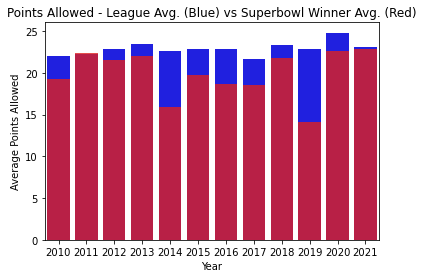

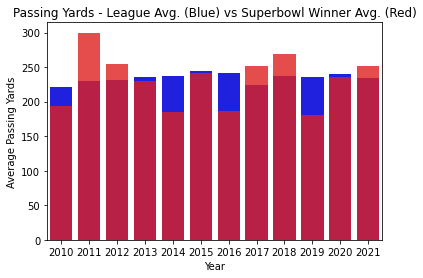

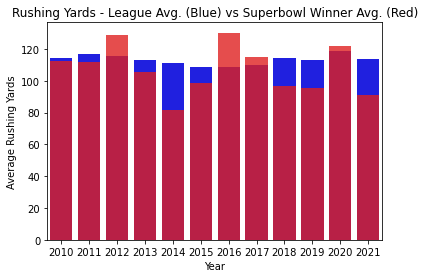

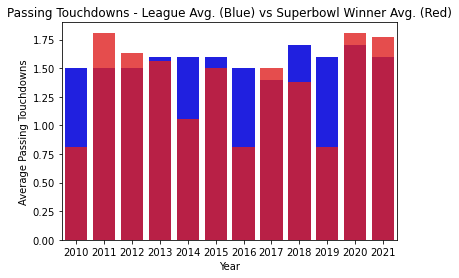

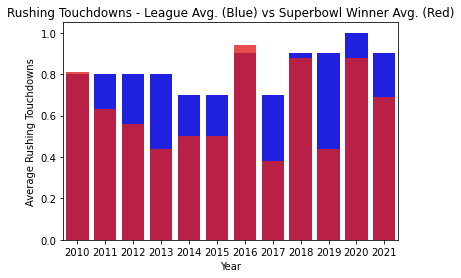

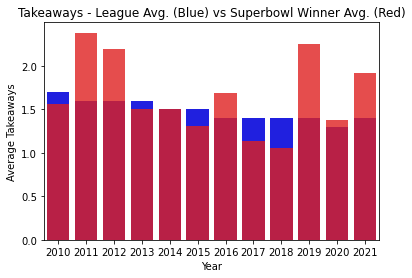

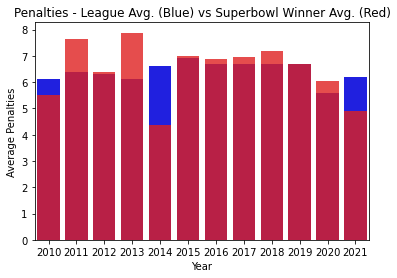

In [6]:
# For the year's league averag dataframe we will add column for the corresponding superbowl winner's stat for each statistical cloumn
for stat in team_df.columns:
    if(stat != 'Year' and stat != 'Team'):
        winnerAverages = []
        for index, row in avg_df.iterrows():
            winner = row['SB_Winner']
            year = row['Year']    
            # if the year and super bowl winner match we can include this stat average as the super bowl winner's
            for i, r in team_df.iterrows():
                if(r['Team'] == winner):
                    if(r['Year'] == year):
                        avg = r[stat]
                        #print(str(year) + ' ' + winner + " - " + stat + ' average' + ' = ' + str(avg))
                        winnerAverages.append(avg)
        
        newColName = 'SBWinner_Avg_' + stat
        avgColName = "Avg_" + stat
        
        avg_df[newColName] = winnerAverages
        avg_df[newColName] = avg_df[newColName].astype('float') 
        avg_df[avgColName] = avg_df[avgColName].astype('float')   
        
        # lets create the barplots to display the league averages compared to the super winner's averages
        ax = plt.subplots()
        ax = sns.barplot(x="Year", y=avgColName, data=avg_df, color='blue')
        ax = sns.barplot(x="Year", y=newColName, data=avg_df, color='red', alpha=0.8)
        ax.set_title(stat.replace("_", ' ') + " - League Avg. (Blue) vs Superbowl Winner Avg. (Red)") 
        ax.set(xlabel="Year", ylabel="Average " + stat.replace("_", ' ')) 
        
display(avg_df)        
plt.show()

### Let's look deeper into the league averages and the super bowl winner defensive differences
##### Points allowed
Starting with the barplot for the average points allowed we can see that for the vast majority of years (excluding he even 2011) the league's defenses on average allowed more points per game than the super bowl winning team did. This makes sense since good defenses don't allow as many points to be scored on them. So far this would in fact indicate that there is a correlationship between a championship team and an above average defense.

##### Passing yards
Now let's look at the passing yards. The averages are much closer here with the superbowl winning team allowing more passing yards on average for the years 2011,2012,2017, and 2018. This is interesting because in general one would think that allowing less passing yards would be ideal but it seems that for almost half these years the super bowl winning defense allowed more passing yards than the leagues average!

##### Rushing yards
Rushing yards is next and has a simular story to average passing yards. We can see that in 2012,2016,2017, and 2018 the league's defenses allowed less rushing yard's on average relative to the superbowl winning defense those years.

##### Passing touchdowns
When it comes to the passing touchdowns we see some visually extreme differences for certain years such as in 2010 where the league averages 1.5 passing touchdowns allowed while the superbowl winning team defense only allowed around 0.76 touchdowns. Simular extremes are visible for the years 2014, 2016, and 2019. Again for almost half these years the superbowl winning team allowed more passing touchdowns on average than the leagues defenses on average.

##### Rushing touchdowns
The differences in rushing touchdowns allowed is quite apparent for most years. The general trend shows that the superbowl inning team allows a less touchdowns than the league on average. 2016 and 2010 seems to be the outliers here. Its important to note that 2016 was an outlier as well when it came to passing touchdowns but in the other direction. That means that in the 2016 the super bowl champion Denver Broncos struggled in stoping rushing touchdowns but their defense made up for it in stopping passing touchdowns! Balance indeed.

#### Takeaways (turnovers)
Just over half of the years have the sueprbowl winning team forcing an larger average of turnovers than the league's defenses. 2011, 2012, and 2019 are very notible years where the turnover average was very high (> 2.0) which indiactes those superbowl teams did very well forcing their opponents in giving up possesion. 

#### Penalties
Penalties hurt defenses since it gives the opponents offense more yards and gets them closer to scoring. Interestingly for most years the super bowl team's had just above the league's average in penalties. Notibly 2013 was much high than usual relative the league while 2014 had a lower penalty average compared to the league. The data here appears to be go against the super bowl champs since having more penalities is seen as bad for a defense.

## What aspects of defense stand out?
Improving defensive behavior is undoubtly beneficial for a winning team however the data we've analyzed has shown that even championship teams fall short in some categories. Of the last twelve Superbowl winners, eight had greater than or the same number of penalities against them on average relative to the league's defensive average. In contrast, when it comes to points allowed 100% of super bowl teams in the data allowed less than or equal to the leagues average points allowed. Hence, a correlation between winning the superbowl and allowing less points scored as a defensive is apparent. This is of course very logical as the fundemental purpose of the defense is not allowing the other team to score. The scope of providing strategies and decisions on not allowing other teams to score as a defense is beyond the scope of our study, however, understanding that being above the leagues average (in terms of least points allowed) is a historically good indicator that the defense is on the right track to leading a super bowl winning team. Again, it is a key element for winning and statistics prove that but it is not enough to substantiate that defense is what wins it all especailly since other indicators fall short. 

## Machine Learning

In [7]:
#imports
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:
#load data
#copy dataframe because we will be making some changes 
team_df2 = team_df.copy()

#set year values in both table to intergers
sbWinners.Year = sbWinners.Year.astype('int')
team_df2.Year = team_df2.Year.astype('int')

#loop through and fill in the super bowl winner column with boolean value
#true if they won and false if they lost 
team_df2['Superbowl_Winner?'] = 0
for i, row in sbWinners.iterrows():
    for j, row2 in team_df2.iterrows():
        if row['Year'] == row2['Year'] and row['Winner'] == row2['Team']:
                team_df2.at[j,'Superbowl_Winner?'] = 1
                
        

In [9]:
#Determine feature names we want to consider in use of prediction and create x and y matrices 
feature= ['Points_Allowed','Passing_Yards','Rushing_Yards','Passing_Touchdowns','Rushing_Touchdowns','Takeaways','Penalties']
target = ['Superbowl_Winner?']


### 2019 Prediction and comparison 

In [10]:
#This  first section will train data based on the previous years leading up to 2019 the test based then 
#2019 data we will later compare this to the actual winner of the super bowl in 2019
team_names_2019 = np.asarray(team_df['Team'][-96:-64]) 
X_2019 = np.asarray(team_df2[feature][:-64])
Y_2019 = np.asarray(team_df2['Superbowl_Winner?'][:-64])

X_2019.shape, Y_2019.shape

((320, 7), (320,))

In [11]:
#split data 
#test data contains data from 2010-2018 and will make a prediction for 2019
X_2019_train, X_2019_test, Y_2019_train, Y_2019_test = train_test_split(X_2019, Y_2019, test_size=0.1)

In [12]:
#training data dimensions 
X_2019_train.shape, Y_2019_train.shape

((288, 7), (288,))

In [13]:
#Decision Tree for 2019 prediction 
clf = tree.DecisionTreeClassifier()
clf.fit(X_2019_train,Y_2019_train)
Y_pred = clf.predict(X_2019_test)
predicted_winner = ''
actual_winner =''

#identifying winners
for i, row in sbWinners.iterrows():
    if row['Year'] == 2019:
        actual_winner = row['Winner']

for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        predicted_winner = team_names_2019[i]

print("The predicted winner for 2019 was " + predicted_winner+ 'while the actual winner was ' + actual_winner)


The predicted winner for 2019 was New York Jetswhile the actual winner was New England Patriots


### 2020 Prediction and comparison 

In [14]:
#This  second section will train data based on the previous years leading up to 2020 then test based the 
#2020 data we will later compare this to the actual winner of the super bowl in 2020
team_names_2020 = np.asarray(team_df['Team'][-64:-32]) 
X_2020 = np.asarray(team_df2[feature][:-32])
Y_2020 = np.asarray(team_df2['Superbowl_Winner?'][:-32])

X_2020.shape, Y_2020.shape


((352, 7), (352,))

In [15]:
#split data 
#test data contains data from 2010-2019 and will make a prediction for 2020
X_2020_train, X_2020_test, Y_2020_train, Y_2020_test = train_test_split(X_2020, Y_2020, test_size=0.0909090909)


In [16]:
#training data dimensions 
X_2020_train.shape, Y_2020_train.shape


((320, 7), (320,))

In [17]:
#testing data dimensions 
X_2020_test.shape, Y_2020_test.shape


((32, 7), (32,))

In [18]:
#Decision Tree for 2020 prediction 
clf = tree.DecisionTreeClassifier()
clf.fit(X_2020_train,Y_2020_train)
Y_pred = clf.predict(X_2020_test)

#identifying winners
predicted_winner = ''
actual_winner =''

for i, row in sbWinners.iterrows():
    if row['Year'] == 2020:
        actual_winner = row['Winner']

for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        predicted_winner = team_names_2020[i]

print("The predicted winner for 2020 was " + predicted_winner + 'while the actual winner was ' + actual_winner)




The predicted winner for 2020 was Jacksonville Jaguarswhile the actual winner was Kansas City Chiefs


### 2020 Prediction

In [19]:
#For the last section we will train data based on the previous years leading up to 2021 then test based the 
#2021 data we will later compare this to the actual winner of the super bowl in 2021
team_names_2021 = np.asarray(team_df['Team'][-32:]) 
X_2021 = np.asarray(team_df2[feature])
Y_2021 = np.asarray(team_df2['Superbowl_Winner?'])

X_2021.shape, Y_2021.shape


((384, 7), (384,))

In [20]:
#split data 
#test data contains data from 2010-2020 and will make a prediction for 2021
X_2021_train, X_2021_test, Y_2021_train, Y_2021_test = train_test_split(X_2021, Y_2021, test_size=0.08333333333)


In [21]:
#training data dimensions 
X_2021_train.shape, Y_2021_train.shape

((352, 7), (352,))

In [22]:
#testing data dimensions 
X_2021_test.shape, Y_2021_test.shape

#Decision Tree for 2021 prediction 
clf = tree.DecisionTreeClassifier()
clf.fit(X_2021_train,Y_2021_train)
Y_pred = clf.predict(X_2021_test)

#identifying winners
predicted_winner = ''

for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        predicted_winner = team_names_2021[i]

print("The predicted winner for 2021 is " + predicted_winner)



The predicted winner for 2021 is New York Jets


### Metrics for 2021

In [23]:
clf.fit(X_2021_train, Y_2021_train)
clf.score(X_2021_test, Y_2021_test)

#Metrics for 2021
print("Metrics")
scores = cross_val_score(clf, X_2021, Y_2021, cv=5)
print("scores: ", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Metrics
scores:  [0.93506494 0.96103896 0.90909091 0.90909091 0.93421053]
0.93 accuracy with a standard deviation of 0.02


# Conclusion
The goal of this study was to examine the importance of defense in winning an NFL championship today by means of data science and machine learning analysis techniques.

Our results found that average team defensive statistics are not good significant predictors of championship teams. In fact teams that won championship in recent NFL seasons had often struggled in significant defensive categories such as penalities, passing yards, and rushing yards. Often times the league on averages had better defensive stats in those categories. 

Our machine learning model did its best to dtermine which teams would win the superbowl but ultimatley fell short especailly on years that we know who won such as 2019 and 2020. Despite the correlation being poor some excellent defensive performances indicators of championship teams were in certain statistical categories. For example when it came to takeaways the data revealed that superbowl winning teams often had a significantly higher turnover average than the league's average. This in itself is indicative of a championship teams. Which makes sense sense forcing turnovers give your teeam the ball back. Not to mention when it came to points alloed almost 100% of the superbowl winning teams in the dataset allowed less points on average than the league's defenses. A team that does this exceptionally well could very well be a super bowl winning team. Nevertheless, some of the other indicators we isolated including  penalties showed that important aspects of defense may correlate as strongly with championship teams. Often times the super bowl winning team had a defense that was penalized more than the leagues average. 

So the saying "defense wins championship" is somehwhat misleading based on our data. Dominating on both the offensive and defensive sides of the basketball is critical to seeing the bigger picture.  Although some aspects of “Defense wins
championships” (forcing turnovers) holds some truth in the modern NFL... it but fails to acknowledge that balanced teams have been the true Super bowl champs and that even they can be lackluster in some defensive aspects. 